In [1]:
!pip install implicit

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1MB 12.6MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp36-cp36m-linux_x86_64.whl size=3419518 sha256=03aba17198376b63ebac84c10f8d627731dbbae8b643e99d14e2cb7acf7a3160
  Stored in directory: /root/.cache/pip/wheels/bf/d4/ec/fd4f622fcbefb7521f149905295b2c26adecb23af38aa28217
Successfully built implicit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# –î–ª—è —Ä–∞–±–æ—Ç—ã —Å –º–∞—Ç—Ä–∏—Ü–∞–º–∏
from scipy.sparse import csr_matrix, coo_matrix

# –î–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã
from implicit.nearest_neighbours import ItemItemRecommender, CosineRecommender, TFIDFRecommender, BM25Recommender

# –ú–µ—Ç—Ä–∏–∫–∏
from implicit.evaluation import train_test_split
from implicit.evaluation import precision_at_k, mean_average_precision_at_k, AUC_at_k, ndcg_at_k

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/GB_Recommendation_systems/Lesson_02/retail_train.csv')
data.head()

user_id    basket_id  day  ...  week_no  coupon_disc  coupon_match_disc
0     2375  26984851472    1  ...        1          0.0                0.0
1     2375  26984851472    1  ...        1          0.0                0.0
2     2375  26984851472    1  ...        1          0.0                0.0
3     2375  26984851472    1  ...        1          0.0                0.0
4     2375  26984851472    1  ...        1          0.0                0.0

[5 rows x 12 columns]

In [5]:
test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

In [6]:
result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns=['user_id', 'actual']
result['actual'] = result['actual'].apply(lambda x: list(x))
result.head()

user_id                                             actual
0        1  [821867, 834484, 856942, 865456, 889248, 90795...
1        3  [835476, 851057, 872021, 878302, 879948, 90963...
2        6  [920308, 926804, 946489, 1006718, 1017061, 107...
3        7  [840386, 889774, 898068, 909714, 929067, 95347...
4        8  [835098, 872137, 910439, 924610, 992977, 10412...

In [7]:
def random_recommendation(items, n=5):
    """–°–ª—É—á–∞–π–Ω—ã–µ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏"""
    
    items = np.array(items)
    recs = np.random.choice(items, size=n, replace=False)
    
    return recs.tolist()

In [8]:
%%time

items = data_train.item_id.unique()

result['random_recommendation'] = result['user_id'].apply(lambda x: random_recommendation(items, n=5))
result.head(2)

CPU times: user 3.76 s, sys: 28.6 ms, total: 3.79 s
Wall time: 3.8 s


In [9]:
result.head()

user_id  ...                          random_recommendation
0        1  ...   [12187839, 93320, 923559, 1021133, 15596625]
1        3  ...  [1547254, 1489189, 5592689, 1121335, 1091248]
2        6  ...  [1029171, 895193, 1325795, 9297545, 12170978]
3        7  ...   [13115896, 825075, 7443441, 6919174, 991487]
4        8  ...    [971839, 840595, 1074509, 950697, 13133772]

[5 rows x 3 columns]

In [10]:
def popularity_recommendation(data, n=5):
    """–¢–æ–ø-n –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤"""
    
    popular = data.groupby('item_id')['sales_value'].sum().reset_index()
    popular.sort_values('sales_value', ascending=False, inplace=True)
    
    recs = popular.head(n).item_id
    
    return recs.tolist()

In [11]:
%%time

# –ú–æ–∂–Ω–æ —Ç–∞–∫ –¥–µ–ª–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —é–∑–µ—Ä–∞
popular_recs = popularity_recommendation(data_train, n=5)

result['popular_recommendation'] = result['user_id'].apply(lambda x: popular_recs)
result.head(2)

CPU times: user 103 ms, sys: 0 ns, total: 103 ms
Wall time: 111 ms


In [12]:
result.head()

user_id  ...                         popular_recommendation
0        1  ...  [6534178, 6533889, 1029743, 6534166, 1082185]
1        3  ...  [6534178, 6533889, 1029743, 6534166, 1082185]
2        6  ...  [6534178, 6533889, 1029743, 6534166, 1082185]
3        7  ...  [6534178, 6533889, 1029743, 6534166, 1082185]
4        8  ...  [6534178, 6533889, 1029743, 6534166, 1082185]

[5 rows x 4 columns]

### –û—Ü–µ–Ω–∏–≤–∞–Ω–∏–µ
–ó–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏ –∫–∞–∂–¥–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è 1 –±–∞–ª–ª

4 –±–∞–ª–ª–∞ -> –æ—Ç–ª

3 –±–∞–ª–ª–∞ -> —Ö–æ—Ä

–ò —Ç–¥

### –ó–∞–¥–∞–Ω–∏–µ 0. –¢–æ–≤–∞—Ä 999999
–ù–∞ –≤–µ–±–∏–Ω–∞—Ä–µ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ —Ç–æ–≤–∞—Ä 999999 - —á—Ç–æ —ç—Ç–æ –∑–∞ —Ç–æ–≤–∞—Ä? –ó–∞—á–µ–º –æ–Ω –Ω—É–∂–µ–Ω. –ò—Å–ø–æ–ª—å–∑—É—è —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä –º—ã —Å–º–µ—â—è–µ–º –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π. –í –∫–∞–∫—É—é —Å—Ç–æ—Ä–æ–Ω—É? –ú–æ–∂–Ω–æ –ª–∏ —É–¥–∞–ª–∏—Ç—å —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä? –£–±–µ—Ä–∏—Ç–µ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å –∫–∞—á–µ—Å—Ç–≤–æ–º –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ.

In [13]:
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

In [14]:
top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

In [15]:
data_train_top = data_train.loc[data_train['item_id'].isin(top_5000)]
data_train_top.head()

user_id    basket_id  day  ...  week_no  coupon_disc  coupon_match_disc
0     2375  26984851472    1  ...        1          0.0                0.0
1     2375  26984851472    1  ...        1          0.0                0.0
2     2375  26984851472    1  ...        1          0.0                0.0
3     2375  26984851472    1  ...        1          0.0                0.0
4     2375  26984851472    1  ...        1          0.0                0.0

[5 rows x 12 columns]

In [16]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id',
                                  columns='item_id', 
                                  values='quantity',
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix[user_item_matrix > 0] = 1 # —Ç–∞–∫ –∫–∞–∫ –≤ –∏—Ç–æ–≥–µ —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å 
user_item_matrix = user_item_matrix.astype(float) # –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π —Ç–∏–ø –º–∞—Ç—Ä–∏—Ü—ã –¥–ª—è implicit

# –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤ —Ñ–æ—Ä–º–∞—Ç saprse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

In [17]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [18]:
# %%time

model = ItemItemRecommender(K=5, num_threads=4) # K - –∫–æ–ª-–≤–æ –±–∏–ª–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # –ù–∞ –≤—Ö–æ–¥ item-user matrix
          show_progress=True)

recs = model.recommend(userid=userid_to_id[2],  # userid - id –æ—Ç 0 –¥–æ N
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
                        N=5, # –∫–æ–ª-–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π 
                        filter_already_liked_items=False, 
                        filter_items=None, 
                        recalculate_user=True)

In [19]:
recs

[(34707, 75614.0),
 (23590, 60381.0),
 (36454, 28271.0),
 (39619, 21721.0),
 (25064, 18600.0)]

In [20]:
result['itemitem'] = result['user_id'].\
    apply(lambda x: [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[x], 
                                    user_items=sparse_user_item,   # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
                                    N=5, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)])

In [21]:
result.head()

user_id  ...                                     itemitem
0        1  ...   [1082185, 981760, 1127831, 995242, 840361]
1        3  ...   [1082185, 981760, 1098066, 826249, 995242]
2        6  ...  [1082185, 981760, 1127831, 995242, 1098066]
3        7  ...  [1082185, 981760, 1127831, 995242, 1098066]
4        8  ...  [1082185, 981760, 1098066, 995242, 1127831]

[5 rows x 5 columns]

In [22]:
# –ó–∞–≤–µ–¥–µ–º —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π item_id (–µ—Å–ª–∏ —é–∑–µ—Ä –ù–ï –ø–æ–∫—É–ø–∞–ª —Ç–æ–≤–∞—Ä—ã –∏–∑ —Ç–æ–ø-5000, —Ç–æ –æ–Ω "–∫—É–ø–∏–ª" —Ç–∞–∫–æ–π —Ç–æ–≤–∞—Ä)
data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity',
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix[user_item_matrix > 0] = 1 # —Ç–∞–∫ –∫–∞–∫ –≤ –∏—Ç–æ–≥–µ —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å 
user_item_matrix = user_item_matrix.astype(float) # –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π —Ç–∏–ø –º–∞—Ç—Ä–∏—Ü—ã –¥–ª—è implicit

# –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤ —Ñ–æ—Ä–º–∞—Ç saprse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head()

item_id  202291    397896    420647    ...  15927661  15927850  16809471
user_id                                ...                              
1             0.0       0.0       0.0  ...       0.0       0.0       0.0
2             0.0       0.0       0.0  ...       0.0       0.0       0.0
3             0.0       0.0       0.0  ...       0.0       0.0       0.0
4             0.0       0.0       0.0  ...       0.0       0.0       0.0
5             0.0       0.0       0.0  ...       0.0       0.0       0.0

[5 rows x 5001 columns]

In [24]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [25]:
%%time

model = ItemItemRecommender(K=5, num_threads=4) # K - –∫–æ–ª-–≤–æ –±–∏–ª–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # –ù–∞ –≤—Ö–æ–¥ item-user matrix
          show_progress=True)

recs = model.recommend(userid=userid_to_id[2],  # userid - id –æ—Ç 0 –¥–æ N
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
                        N=5, # –∫–æ–ª-–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π 
                        filter_already_liked_items=False, 
                        filter_items=None, 
                        recalculate_user=True)


CPU times: user 2.78 s, sys: 29.8 ms, total: 2.81 s
Wall time: 2.08 s


In [26]:
%%time

result['itemitem_999999'] = result['user_id'].\
    apply(lambda x: [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[x], 
                                    user_items=sparse_user_item,   # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
                                    N=5, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)])

CPU times: user 64.3 ms, sys: 826 ¬µs, total: 65.2 ms
Wall time: 66.6 ms


In [27]:
result.head()

user_id  ...                              itemitem_999999
0        1  ...   [999999, 1082185, 981760, 1127831, 995242]
1        3  ...   [999999, 1082185, 981760, 1098066, 995242]
2        6  ...   [999999, 1082185, 981760, 1127831, 995242]
3        7  ...   [999999, 1082185, 981760, 1127831, 995242]
4        8  ...  [999999, 1082185, 981760, 1127831, 1098066]

[5 rows x 6 columns]

In [28]:
def precision_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    bought_list = bought_list  # –¢—É—Ç –Ω–µ—Ç [:k] !!
    recommended_list = recommended_list[:k]
    flags = np.isin(bought_list, recommended_list)
    #print(flags)
    precision = flags.sum() / len(recommended_list)
    return precision

print('itemitem', round(result.apply(lambda row: precision_at_k(row['itemitem'], row['actual']), axis=1).mean(), 5))
print('itemitem_999999', round(result.apply(lambda row: precision_at_k(row['itemitem_999999'], row['actual']), axis=1).mean(), 5))

itemitem 0.15406
itemitem_999999 0.13692


–ò—Å–ø–æ–ª—å–∑—É—è —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π item_id –ø–æ–¥ –Ω–æ–º–µ—Ä–æ–º 999999(—Ç–æ–≤–∞—Ä—ã –Ω–µ –∏–∑ —Ç–æ–ø-5000) –º—ã —É—Ö—É–¥—à–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π

### –ó–∞–¥–∞–Ω–∏–µ 1. Weighted Random Recommendation

–ù–∞–ø–∏—à–∏—Ç–µ –∫–æ–¥ –¥–ª—è —Å–ª—É—á–∞–π–Ω—ã—Ö —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–π, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å —Ç–æ–≤–∞—Ä –ø—Ä—è–º–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º—É –ø—Ä–æ–¥–∞–∂
- –ú–æ–∂–Ω–æ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–æ–≤–∞—Ä—ã —Å–ª—É—á–∞–π–Ω–æ, –Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –∫–∞–∫–æ–º—É-–ª–∏–±–æ –≤–µ—Å—É
- –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä—è–º–æ–ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏. –í–µ—Å = log(sales_sum —Ç–æ–≤–∞—Ä–∞)
- –ü—Ä–∏–¥—É–º–∞–π—Ç–µ –ø—Ä–∏–º–µ—Ä 3 –≤–µ—Å–æ–≤, –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ weighted_random_recommendation –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –≤–µ—Å–æ–≤

In [29]:
def weighted_random_recommendation(items_weights, n=5):
    """–°–ª—É—á–∞–π–Ω—ã–µ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏
    
    Input
    -----
    items_weights: pd.DataFrame
        –î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ç–æ–ª–±—Ü–∞–º–∏ item_id, weight. –°—É–º–º–∞ weight –ø–æ –≤—Å–µ–º —Ç–æ–≤–∞—Ä–∞–º = 1
    """
    items = items_weights['item_id'].values
    weights = items_weights['weight'].values

    recs = np.random.choice(items, size=n, replace=False, p=weights)

    # –ü–æ–¥—Å–∫–∞–∑–∫–∞: –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é random_recommendation()
    # your_code
    
    return recs.tolist()

–°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [30]:
item_weights = data_train.groupby('item_id')['sales_value'].sum().reset_index()
item_weights['weight'] = item_weights['sales_value']/np.sum(item_weights['sales_value'])
item_weights.head()

item_id  sales_value    weight
0   202291        81.59  0.000012
1   397896      2862.41  0.000406
2   420647       463.81  0.000066
3   480014       863.41  0.000122
4   545926        58.37  0.000008

In [31]:
%%time

result['weighted_random_recommendation'] = result['user_id'].apply(lambda x: weighted_random_recommendation(items_weights=item_weights, n=5))

CPU times: user 373 ms, sys: 0 ns, total: 373 ms
Wall time: 377 ms


In [32]:
result.head()

user_id  ...                weighted_random_recommendation
0        1  ...   [999999, 1005186, 6534166, 1079987, 899019]
1        3  ...   [999999, 5569230, 6034577, 6534178, 970747]
2        6  ...  [1135552, 1125278, 999999, 8090440, 6442594]
3        7  ...   [999999, 1029743, 1005186, 1103741, 866878]
4        8  ...   [1025535, 9802914, 999858, 972445, 6534178]

[5 rows x 7 columns]

In [33]:
def weighted_random_recommendation_log(items_weights_log, n=5):
    """–°–ª—É—á–∞–π–Ω—ã–µ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏
    
    Input
    -----
    items_weights: pd.DataFrame
        –î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ç–æ–ª–±—Ü–∞–º–∏ item_id, weight. –°—É–º–º–∞ weight –ø–æ –≤—Å–µ–º —Ç–æ–≤–∞—Ä–∞–º = 1
    """
    items = items_weights_log['item_id'].values
    weights = items_weights_log['weight'].values

    recs = np.random.choice(items, size=n, replace=False, p=weights)

    # –ü–æ–¥—Å–∫–∞–∑–∫–∞: –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é random_recommendation()
    # your_code
    
    return recs.tolist()

In [39]:
item_weights_log = data_train.groupby('item_id')['sales_value'].sum().reset_index()

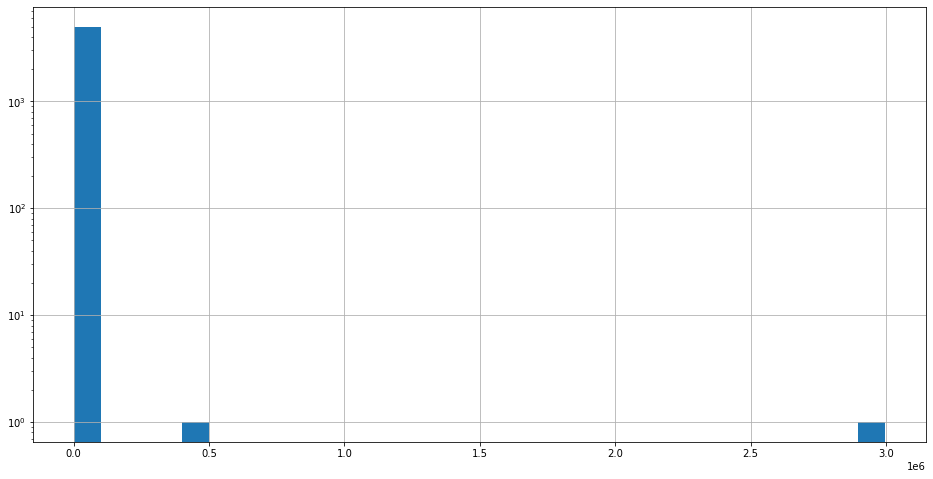

In [40]:
plt.figure(figsize=(16, 8))
item_weights_log['sales_value'].hist(bins=30)
plt.yscale(value="log")
plt.show()

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Ñ—É–Ω–∫—Ü–∏—è –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –æ—Ç –ø—Ä–æ–¥–∞–∂ –Ω–µ –ø—Ä–∏–Ω–∏–º–∞–ª–∞ –∑–Ω–∞—á–µ–Ω–∏–µ -inf –∏–ª–∏ <=0, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∫ —Å—É–º–º–µ –ø—Ä–æ–¥–∞–∂ –ø–æ —Ç–æ–≤–∞—Ä—É –ø—Ä–∏–±–∞–≤–ª—è—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—É—é –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É, –Ω–∞–ø—Ä–∏–º–µ—Ä 1.1

In [43]:
item_weights_log.loc[item_weights_log['sales_value']>50000, 'sales_value'] = 44779.99
item_weights_log['sales_value_log'] = np.log(item_weights_log['sales_value'] + 1.1)
total = np.sum(item_weights_log['sales_value_log'])
item_weights_log['weight'] = item_weights_log['sales_value_log'] / total
item_weights_log.head()

item_id  sales_value    weight  sales_value_log
0   202291        81.59  0.000147         4.415099
1   397896      2862.41  0.000265         7.959803
2   420647       463.81  0.000205         6.141844
3   480014       863.41  0.000225         6.762163
4   545926        58.37  0.000136         4.085472

In [44]:
np.sum(item_weights_log['weight'])

0.9999999999999999

In [45]:
%%time

result['weighted_random_recommendation_log'] = result['user_id'].apply(lambda x: weighted_random_recommendation_log(items_weights_log=item_weights_log, n=5))

CPU times: user 290 ms, sys: 1.96 ms, total: 292 ms
Wall time: 295 ms


In [46]:
result.head()

user_id  ...            weighted_random_recommendation_log
0        1  ...  [1046584, 5566472, 889731, 1089108, 1093013]
1        3  ...   [1048352, 1031316, 829621, 961846, 1056509]
2        6  ...   [1000050, 911614, 954006, 1060529, 8119302]
3        7  ...    [824642, 821344, 835300, 1065331, 7467081]
4        8  ...  [9194758, 1083770, 10285141, 864033, 993685]

[5 rows x 8 columns]

### –ó–∞–¥–∞–Ω–∏–µ 2. –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
–†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ Precision@5 –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ (—Å –≤–µ–±–∏–Ω–∞—Ä–∞ –∏ weighted_random_recommendation) —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –≤–µ–±–∏–Ω–∞—Ä–∞ 1. –ö–∞–∫–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ? –ü–æ—á–µ–º—É?

In [47]:
pd.DataFrame(
    [
        (model_, round(result.apply(lambda row: precision_at_k(recommended_list=row[str(model_)], bought_list=row['actual']), axis=1).mean(), 5)) for model_ in list(result)[2:]
    ], 
    columns=['metric', 'value']
)

metric    value
0               random_recommendation  0.00049
1              popular_recommendation  0.15524
2                            itemitem  0.15406
3                     itemitem_999999  0.13692
4      weighted_random_recommendation  0.03281
5  weighted_random_recommendation_log  0.00744

–ò–∑ –≤—Å–µ—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤, –ø–æ–¥—Ö–æ–¥ –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–æ–≤ popular_recommendation, –¥–∞–ª —Å–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π precision@5. 

### –ó–∞–¥–∞–Ω–∏–µ 3. –£–ª—É—á—à–µ–Ω–∏–µ –±–µ–π–∑–ª–∞–π–Ω–æ–≤ –∏ ItemItem
 - –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —É–ª—É—á—à–∏—Ç—å –±–µ–π–∑–ª–∞–π–Ω—ã, —Å—á–∏—Ç–∞—è –∏—Ö –Ω–∞ —Ç–æ–ø-5000 —Ç–æ–≤–∞—Ä–æ–≤
 - –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —É–ª—É—á—à–∏—Ç—å —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã ItemItemRecommender, –≤—ã–±–∏—Ä–∞—è —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π ùêæ.
 - –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∞–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏–∑—É—á–µ–Ω–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤

In [48]:
def random_recommendation(items, n=5):
    """–°–ª—É—á–∞–π–Ω—ã–µ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏"""
    
    
    items = np.array(items)
    recs = np.random.choice(items, size=n, replace=False)
    
    return recs.tolist()

In [49]:
def popularity_recommendation(data, n=5):
    """–¢–æ–ø-n –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤"""
    
    popular = data.groupby('item_id')['sales_value'].sum().reset_index()
    popular.sort_values('sales_value', ascending=False, inplace=True)
    
    recs = popular.head(n).item_id
    
    return recs.tolist()

In [50]:
data_train2 = data_train.loc[data_train['item_id'].isin(top_5000),]

In [51]:
%%time

items = data_train.item_id.unique()
result['random_recommendation'] = result['user_id'].apply(lambda x: random_recommendation(items, n=5))

CPU times: user 238 ms, sys: 1.08 ms, total: 239 ms
Wall time: 243 ms


In [52]:
%%time

items = data_train2.item_id.unique()
result['random_recommendation_2'] = result['user_id'].apply(lambda x: random_recommendation(items, n=5))

CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 241 ms


In [53]:
%%time

popular_recs = popularity_recommendation(data_train, n=5)
result['popular_recommendation'] = result['user_id'].apply(lambda x: popular_recs)

CPU times: user 57.5 ms, sys: 0 ns, total: 57.5 ms
Wall time: 61.7 ms


In [54]:
%%time

popular_recs = popularity_recommendation(data_train2, n=5)
result['popular_recommendation_2'] = result['user_id'].apply(lambda x: popular_recs)

CPU times: user 43 ms, sys: 13.9 ms, total: 56.9 ms
Wall time: 58.5 ms


In [55]:
pd.DataFrame([
    result.apply(lambda row: precision_at_k(row['random_recommendation'], row['actual']), axis=1).mean(),
    result.apply(lambda row: precision_at_k(row['random_recommendation_2'], row['actual']), axis=1).mean(),
    result.apply(lambda row: precision_at_k(row['popular_recommendation'], row['actual']), axis=1).mean(),
    result.apply(lambda row: precision_at_k(row['popular_recommendation_2'], row['actual']), axis=1).mean(),
], 
    columns=['precision_at_k'], 
    index=['random_recommendation', 'random_recommendation_5–∫', 'popular_recommendation', 'popular_recommendation_5–∫']
).T

random_recommendation  ...  popular_recommendation_5–∫
precision_at_k               0.005779  ...                    0.15524

[1 rows x 4 columns]

In [56]:
result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns = ['user_id', 'actual']

In [57]:
%%time

for k in range(1, 10):
    
    model = ItemItemRecommender(K=k, num_threads=4)  # K - –∫–æ–ª-–≤–æ –±–∏–ª–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
    model.fit(csr_matrix(user_item_matrix).T.tocsr(), show_progress=True)
    
    recs = model.recommend(
        userid=userid_to_id[2],  # userid - id –æ—Ç 0 –¥–æ N
        user_items=csr_matrix(user_item_matrix).tocsr(),  # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
        N=5,  # –∫–æ–ª-–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π 
        filter_already_liked_items=False,
        filter_items=None,
        recalculate_user=True)
    
    result[f'itemitem_K={k}'] = result['user_id'].\
        apply(lambda x: [id_to_itemid[rec[0]] for rec in 
                        model.recommend(userid=userid_to_id[x], 
                                        user_items=sparse_user_item,   # –Ω–∞ –≤—Ö–æ–¥ user-item matrix
                                        N=5, 
                                        filter_already_liked_items=False, 
                                        filter_items=None, 
                                        recalculate_user=True)])


CPU times: user 25.7 s, sys: 287 ms, total: 26 s
Wall time: 19.8 s


In [58]:
pd.DataFrame(
    [
        result.apply(lambda row: precision_at_k(row['itemitem_K=1'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=2'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=3'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=4'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=5'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=6'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=7'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=8'], row['actual']), axis=1).mean(),
        result.apply(lambda row: precision_at_k(row['itemitem_K=9'], row['actual']), axis=1).mean(),
    ], columns = ['precision_at_k'], index=[f'k={i}' for i in range(1, 10)]).sort_values(by='precision_at_k', ascending=False).T

k=2       k=3       k=1  ...       k=7       k=6       k=5
precision_at_k  0.192009  0.186092  0.179987  ...  0.144858  0.142018  0.136925

[1 rows x 9 columns]

### –ó–∞–¥–∞–Ω–∏–µ 4. –£–ª—É—á—à–µ–Ω–∏–µ –¥–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤
–ù–∞ —Å–µ–º–∏–Ω–∞—Ä–µ –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∏ 



–î–∞–ª–µ–µ $U \equiv N_i(u) $

$$r_{u,i} =  \frac{1}{S}\sum\limits_{v \in U}\operatorname{sim}(u,v)r_{v, i}$$
$$ S = \sum\limits_{v \in U} \operatorname{sim}(u,v)$$

–ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —É–ª—É—á—à–∏—Ç—å —ç—Ç—É —Ñ–æ—Ä–º—É–ª—É –∏ —É—á–µ—Å—Ç—å —Å—Ä–µ–¥–Ω–∏–µ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

$$r_{u,i} = \mu + \bar{r_u} + \frac{1}{S}\sum\limits_{v \in U}\operatorname{sim}(u,v)(r_{v, i}-\bar{r_{v}} - \mu)$$

–ö–∞–∫–∏–µ —Å–º—ã—Å–ª –∏–º–µ–µ—é—Ç $ \mu $ –∏ $ \bar{r_u}$ ?

–†–µ–∞–ª–∏–∑—É–π—Ç–µ –∞–ª–≥–æ—Ä–∏—Ç–º, –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É—é—â–∏–π —Ä–µ–π—Ç–∏–Ω–≥–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω–æ–π —Ñ–æ—Ä–º—É–ª—ã, –Ω–∞ numpy (–≤–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞–Ω–Ω–æ!)

–í –∫–∞—á–µ—Å—Ç–≤–µ —Å—Ö–æ–∂–µ—Å—Ç–∏ –≤–æ–∑—å–º–∏—Ç–µ CosineSimilarity.

–ü—Ä–∏–º–µ–Ω–∏—Ç–µ –∫ user_item_matrix. –í –∫–∞—á–µ—Å—Ç–≤–µ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ –≤–æ–∑—å–º–∏—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–ª–∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫—É–ø–ª–µ–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞. 
–î–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥–∏. –ö–∞–∫ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Ñ–∞–∫—Ç –ø–æ–∫—É–ø–∫–∏?

–ü—Ä–µ–¥–ª–æ–∂–∏—Ç–µ –≤–∞—Ä–∏–∞–Ω—Ç.
–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ accuracy@5 –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏, —Ä–∞–∑–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –Ω–∞ –≤–µ–±–∏–Ω–∞—Ä–µ.

$ \mu $ - —Å—Ä–µ–¥–Ω—è—è –æ—Ü–µ–Ω–∫–∞ –ø–æ –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü–µ  
$ \bar{r_u}$ - —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ —Ç–æ–≤–∞—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ü–µ–Ω–∏–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å  